In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
import seaborn as sns
import math
from scipy import stats
import cooler
import cooltools.lib.plotting
from cooltools import insulation
import copy

import itertools

import os
import sys

# local imports 
import filters
import pore_c_utils as pcu

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.WARN)

In [3]:
assembly = pcu.loadAssembly("GRCm39_Assembly.txt")
assembly

,Chromosome,Total length,GenBank accession,RefSeq accession,chromEnd,chromStart
0,1,195154279,CM000994.3,NC_000067.7,195154279,0
1,2,181755017,CM000995.3,NC_000068.8,376909296,195154279
2,3,159745316,CM000996.3,NC_000069.7,536654612,376909296
3,4,156860686,CM000997.3,NC_000070.7,693515298,536654612
4,5,151758149,CM000998.3,NC_000071.7,845273447,693515298
5,6,149588044,CM000999.3,NC_000072.7,994861491,845273447
6,7,144995196,CM001000.3,NC_000073.7,1139856687,994861491
7,8,130127694,CM001001.3,NC_000074.7,1269984381,1139856687
8,9,124359700,CM001002.3,NC_000075.7,1394344081,1269984381
9,10,130530862,CM001003.3,NC_000076.7,1524874943,1394344081


In [4]:
dirpath = "/nfs/turbo/umms-indikar/shared/tools/Pore-C-Snakemake/results_ES5to12/matrix/"

resolution = 1000000

mcools = {
    
}

for file in os.listdir(dirpath):
    if file.endswith('mcool'):
        print(f"{file=}")
        runId = file.split("_")[1]
        fullpath = f"{dirpath}{file}"
        mcools[runId] = cooler.Cooler(f'{fullpath}::resolutions/{resolution}') 

mcools.keys()

file='NlaIII_run06_GRCm39_unphased.matrix.mcool'
file='NlaIII_run01_GRCm39_unphased.matrix.mcool'
file='NlaIII_run03_GRCm39_unphased.matrix.mcool'
file='NlaIII_run04_GRCm39_unphased.matrix.mcool'
file='NlaIII_run02_GRCm39_unphased.matrix.mcool'
file='NlaIII_run07_GRCm39_unphased.matrix.mcool'
file='NlaIII_run05_GRCm39_unphased.matrix.mcool'


dict_keys(['run06', 'run01', 'run03', 'run04', 'run02', 'run07', 'run05'])

# KR Balancing

In [5]:
MAX_ITER = 1000
bias = {}

for runId, clr in mcools.items():
    print(f"{runId=}")
    runCool = copy.deepcopy(clr)
    weights, stats = cooler.balance_cooler(runCool, rescale_marginals=True, store=True, max_iters=MAX_ITER)
    print(stats)
    
print('done')

runId='run06'


/home/cstansbu/.local/lib/python3.8/site-packages/cooler/balance.py:110: ConvergenceWarning: Iteration limit reached without convergence.
  warnings.warn(


{'tol': 1e-05, 'min_nnz': 0, 'min_count': 0, 'mad_max': 0, 'cis_only': False, 'ignore_diags': False, 'scale': 271652.0473036015, 'converged': False, 'var': 48017.093164292004}
runId='run01'
{'tol': 1e-05, 'min_nnz': 0, 'min_count': 0, 'mad_max': 0, 'cis_only': False, 'ignore_diags': False, 'scale': 3257360380.830185, 'converged': False, 'var': 2317529756335146.5}
runId='run03'
{'tol': 1e-05, 'min_nnz': 0, 'min_count': 0, 'mad_max': 0, 'cis_only': False, 'ignore_diags': False, 'scale': 1.5255884652335704e+24, 'converged': False, 'var': 1.779488559281969e+46}
runId='run04'
{'tol': 1e-05, 'min_nnz': 0, 'min_count': 0, 'mad_max': 0, 'cis_only': False, 'ignore_diags': False, 'scale': 50925324445305.19, 'converged': False, 'var': 2.156181249936454e+24}
runId='run02'


/home/cstansbu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/cstansbu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


{'tol': 1e-05, 'min_nnz': 0, 'min_count': 0, 'mad_max': 0, 'cis_only': False, 'ignore_diags': False, 'scale': 2.208378494221208e+175, 'converged': False, 'var': inf}
runId='run07'
{'tol': 1e-05, 'min_nnz': 0, 'min_count': 0, 'mad_max': 0, 'cis_only': False, 'ignore_diags': False, 'scale': 99340.700942515, 'converged': False, 'var': 36557.070915079305}
runId='run05'
{'tol': 1e-05, 'min_nnz': 0, 'min_count': 0, 'mad_max': 0, 'cis_only': False, 'ignore_diags': False, 'scale': 316256.7517186969, 'converged': False, 'var': 25100565.332568467}
done


# create pseudo-bulk data for chrom 2


In [6]:
chromosome = 'NC_000068.8'
    
matrices = []

for runId, clr in mcools.items():
    A = clr.matrix(balance=True).fetch(chromosome)
    print(f"{runId=} {A.shape=}")
    matrices.append(A)
    
print('done')

runId='run06' A.shape=(182, 182)
runId='run01' A.shape=(182, 182)
runId='run03' A.shape=(182, 182)
runId='run04' A.shape=(182, 182)
runId='run02' A.shape=(182, 182)
runId='run07' A.shape=(182, 182)
runId='run05' A.shape=(182, 182)
done


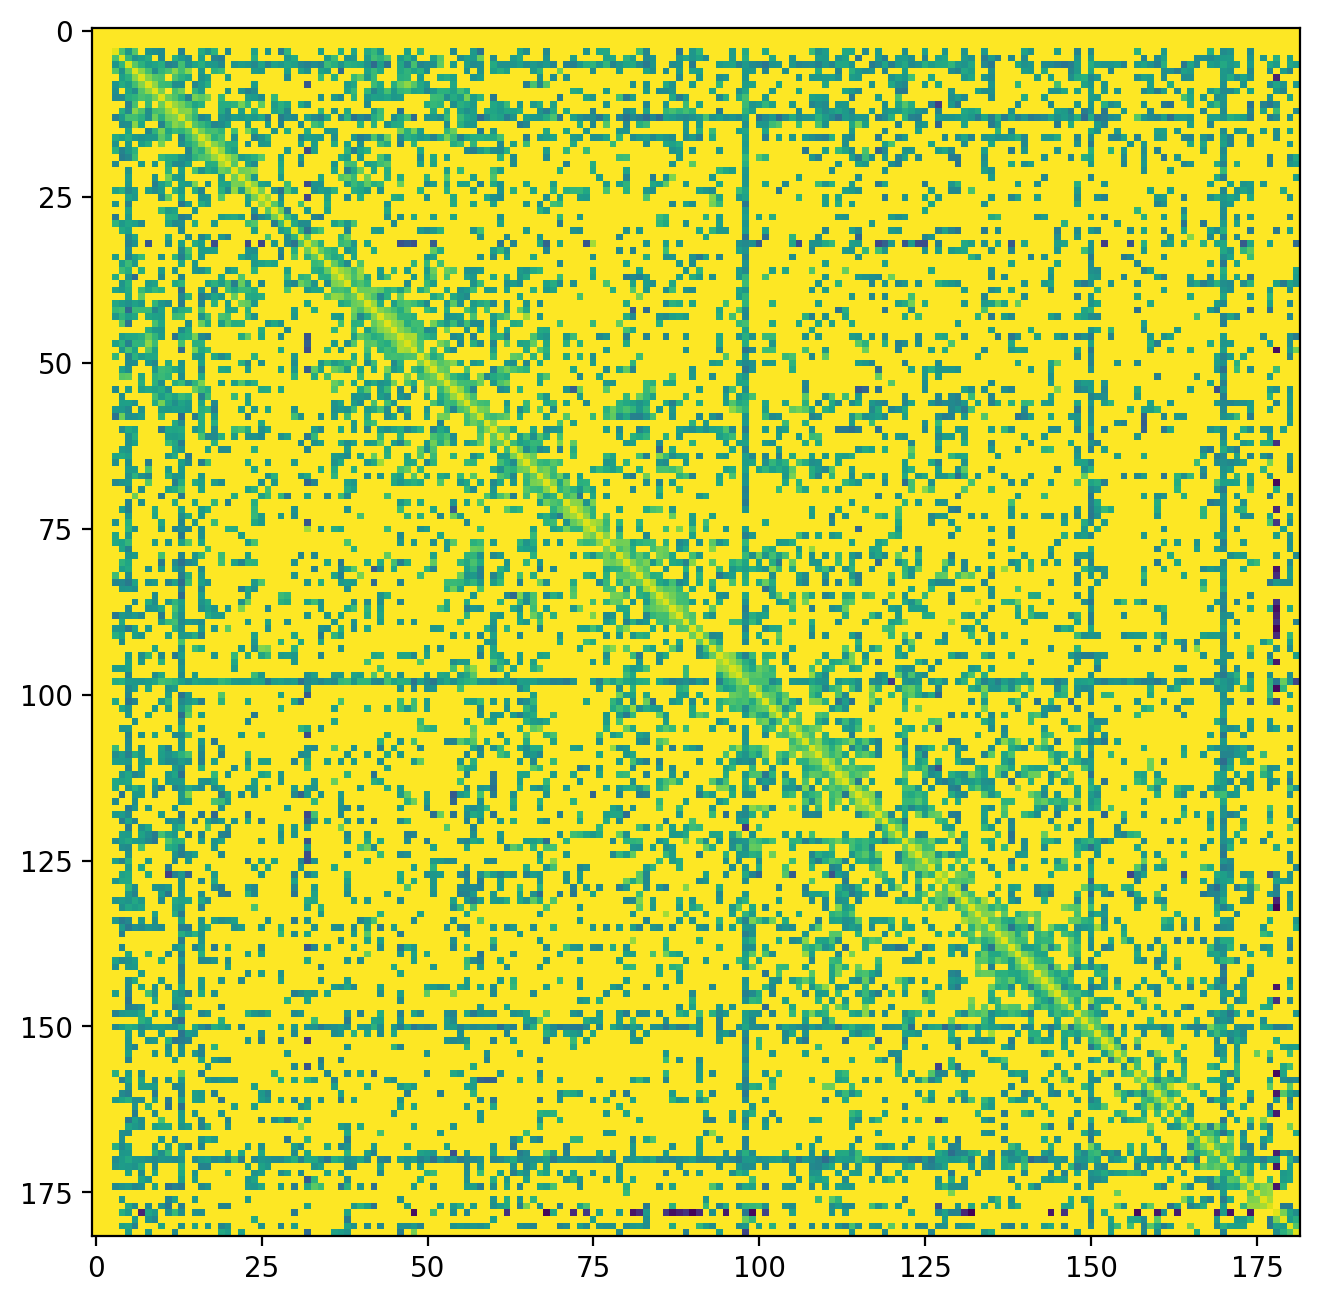

In [20]:
A = np.zeros(matrices[0].shape)

for i in matrices:
    A = A + np.divide(i, len(matrices))
    
Alog = np.ma.log(A).filled(0) # log scale

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 8, 8
plt.imshow(Alog, cmap='viridis')

In [13]:
len(matrices)

7

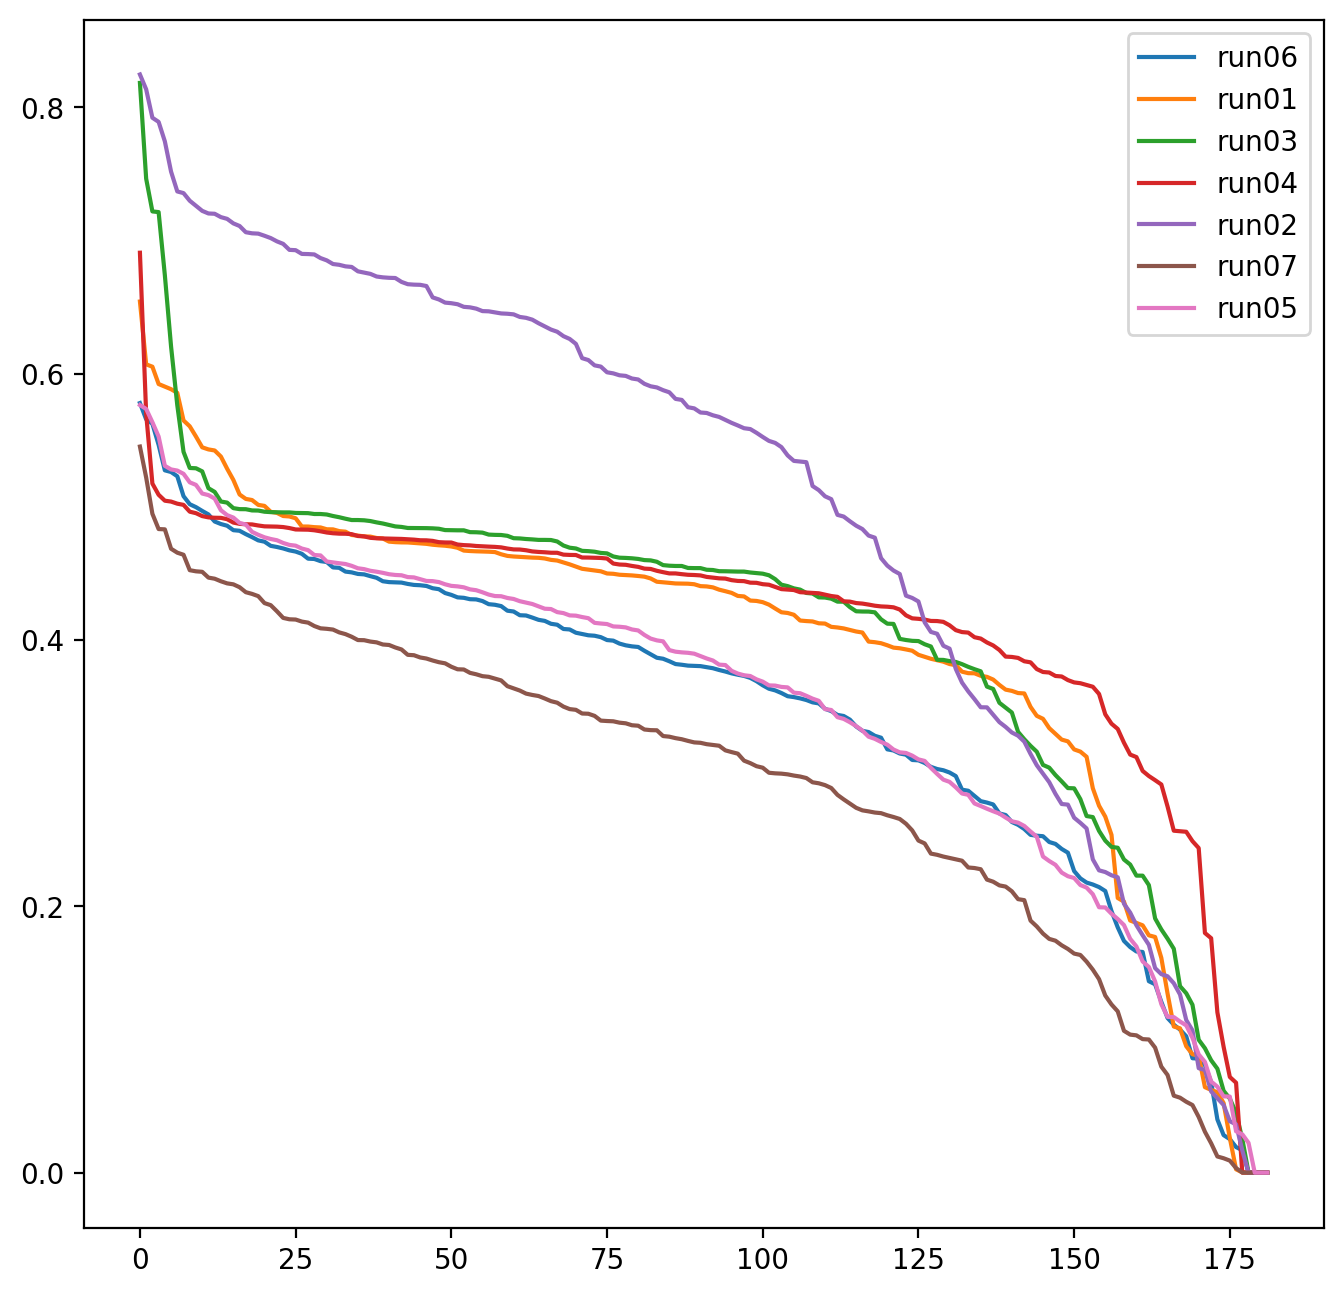

In [16]:


for i, A in  enumerate(matrices):
    u, s, vh = np.linalg.svd(A)
    label = list(mcools.keys())[i]
    
    svd_ind = list(range(len(s)))
    plt.plot(svd_ind, s, label=label)
    
    
plt.legend()
    
    